# Capitulo 2. Proyecto 

👀: verifica que si hayas instalado las librerías que vas a necesitar

# En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

# Panorama completo, como es Londres


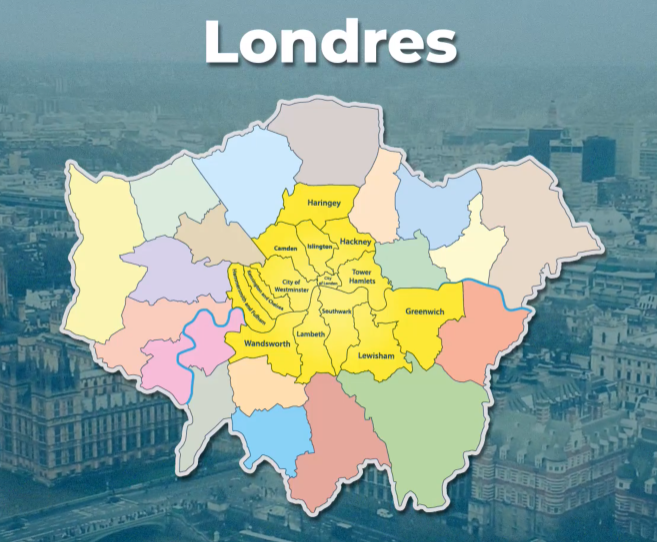

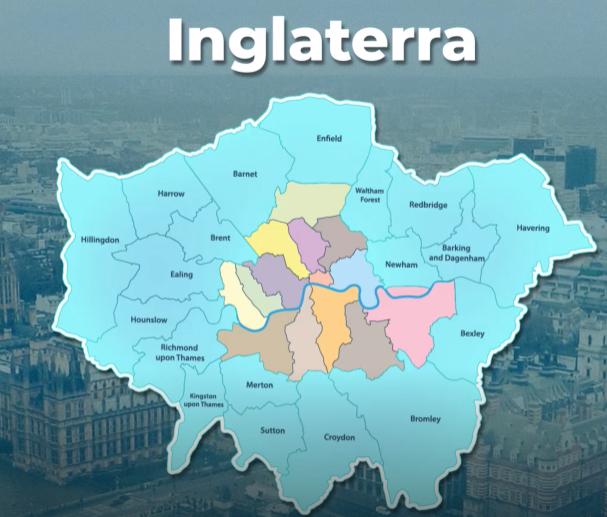

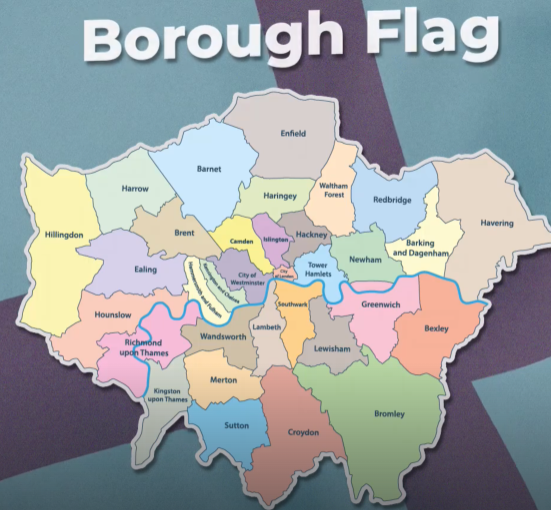

In [ ]:
#  columna BOROUGH FLAG lo que marca si el municipio es parte de la ciudad de londres o solo parte de Inlaterra

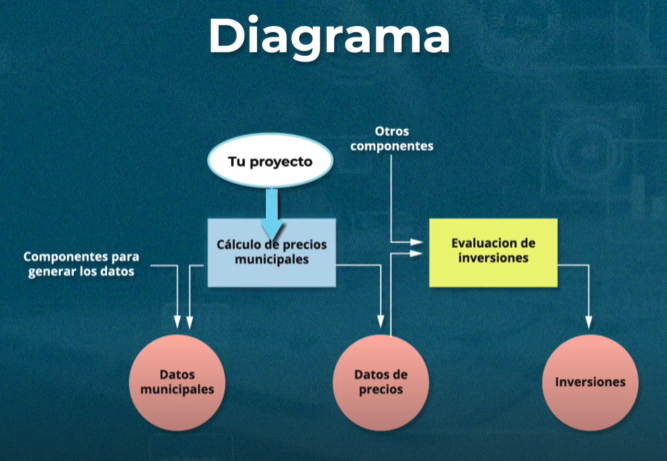

## Es importante saber en que formato nos entregan y en que formato requieren
## SI quieren un numero seria regresion lineal
## si requieren una categoria de alto medio bajo se usaria clasificacion

## se tienen errores de mas o menos %25, con formas anteriores...la idea es tener errores menor que %25.

Preguntas:

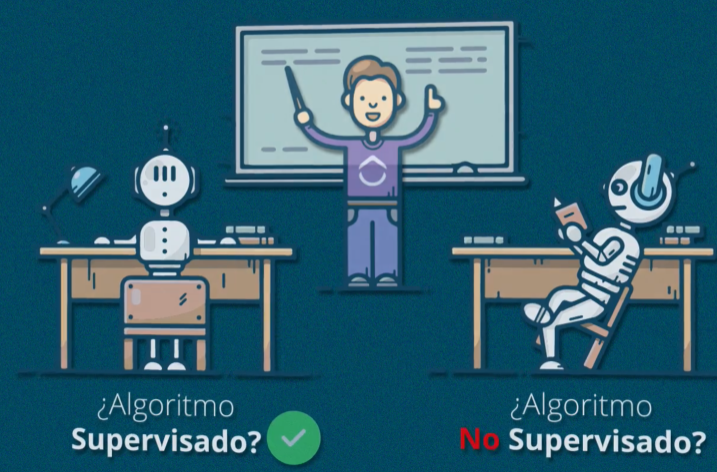

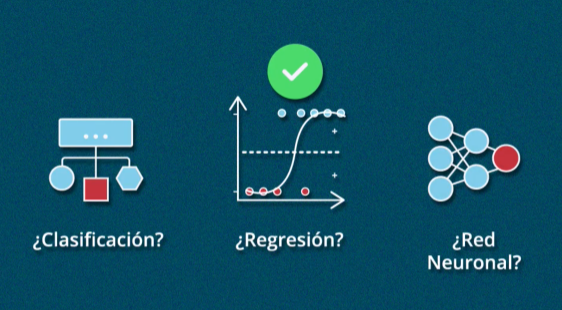

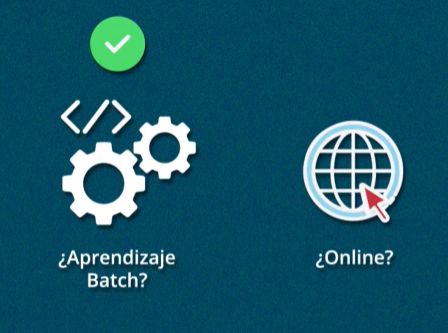



## Respuestas

## depende si trae etiquetas o no...es Aprendizaje Supervizado por que si trae etiquetas
## queremos predecir los precios y para lo cual es mejor la regrasion y solo es una variable, se llama regresion univariante.
## Tenemo un set de datos que nos entregan y solo una vez, entonces es Batch

 ## Se debe validar los supuestos:

## El unico supuesto es que el equipo que recibe nuestra información es entregar un numero, es decir precio.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

In [ ]:
## Importamos nuestras librerias principales panda, numpy, matplotlib, os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os   ## libreria para los nombres

In [ ]:
LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"

In [ ]:
LONDON_HOUSING ="Capitulo_2/housing_in_london_monthly_variables.csv"

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"

In [ ]:
def extraer_datos(root,database):
    csv_path = root + database
    return pd.read_csv(csv_path)

In [ ]:
df1=extraer_datos(DOWNLOAD_ROOT,LONDON_HOUSING)
df2=extraer_datos(DOWNLOAD_ROOT,LONDON_SALARY)

In [ ]:
df1.head()

date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001         17.0   
1  1995-02-01  city of london          82203  E09000001          7.0   
2  1995-03-01  city of london          79121  E09000001         14.0   
3  1995-04-01  city of london          77101  E09000001          7.0   
4  1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1

In [ ]:
df2.head()

code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01        33020.0   
1  E09000002  barking and dagenham  1999-12-01        21480.0   
2  E09000003                barnet  1999-12-01        19568.0   
3  E09000004                bexley  1999-12-01        18621.0   
4  E09000005                 brent  1999-12-01        18532.0   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                NaN       48922             0           6581.0   
1                NaN       23620             3         162444.0   
2                NaN       23128             8         313469.0   
3                NaN       21386            18         217458.0   
4                NaN       20911             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  
0             NaN        NaN           NaN             1  
1             NaN        NaN           NaN             1  
2             NaN        NaN           NaN             1  
3             NaN        NaN           NaN             1  
4             NaN        NaN           NaN             1

***

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [ ]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.


In [ ]:
#Filtrar los datos 
df2 =df2.filter(items =["median_salary","area","date"])
df2.head()

median_salary                  area        date
0        33020.0        city of london  1999-12-01
1        21480.0  barking and dagenham  1999-12-01
2        19568.0                barnet  1999-12-01
3        18621.0                bexley  1999-12-01
4        18532.0                 brent  1999-12-01

In [ ]:
#Fusionar los dos dataframe
data = pd.merge(df2,df1)  ## merge junta dos dataframe
data.head()

median_salary                  area        date  average_price       code  \
0        33020.0        city of london  1999-12-01         169309  E09000001   
1        21480.0  barking and dagenham  1999-12-01          68812  E09000002   
2        19568.0                barnet  1999-12-01         149510  E09000003   
3        18621.0                bexley  1999-12-01          93905  E09000004   
4        18532.0                 brent  1999-12-01         123398  E09000005   

   houses_sold  no_of_crimes  borough_flag  
0         97.0           NaN             1  
1        267.0           NaN             1  
2        619.0           NaN             1  
3        460.0           NaN             1  
4        395.0           NaN             1

In [ ]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 56.6+ KB


👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

***

In [ ]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["area"].value_counts().head()

area
city of london          21
westminster             21
newham                  21
redbridge               21
richmond upon thames    21
Name: count, dtype: int64

https://www.bing.com/maps?q=london+uk&FORM=HDRSC6&cp=51.502602%7E-0.112944&lvl=13.7

In [ ]:
# pd.options.display.float_format="{:,.2f}".format  # quitar los ceros de la tabla

In [ ]:
## Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe(), ejemplo:
data.describe()

median_salary  average_price    houses_sold  no_of_crimes  borough_flag
count     881.000000   9.030000e+02     860.000000    617.000000    903.000000
mean    28789.284904   3.099169e+05    3853.289535   2038.090762      0.767442
std      6508.321987   1.875274e+05   12917.661579    879.517578      0.422697
min     15684.000000   4.829800e+04       6.000000      0.000000      0.000000
25%     24582.000000   1.892870e+05     246.000000   1542.000000      1.000000
50%     28284.000000   2.608930e+05     351.000000   2008.000000      1.000000
75%     31589.000000   3.875970e+05     626.000000   2402.000000      1.000000
max     61636.000000   1.364185e+06  119458.000000   7461.000000      1.000000

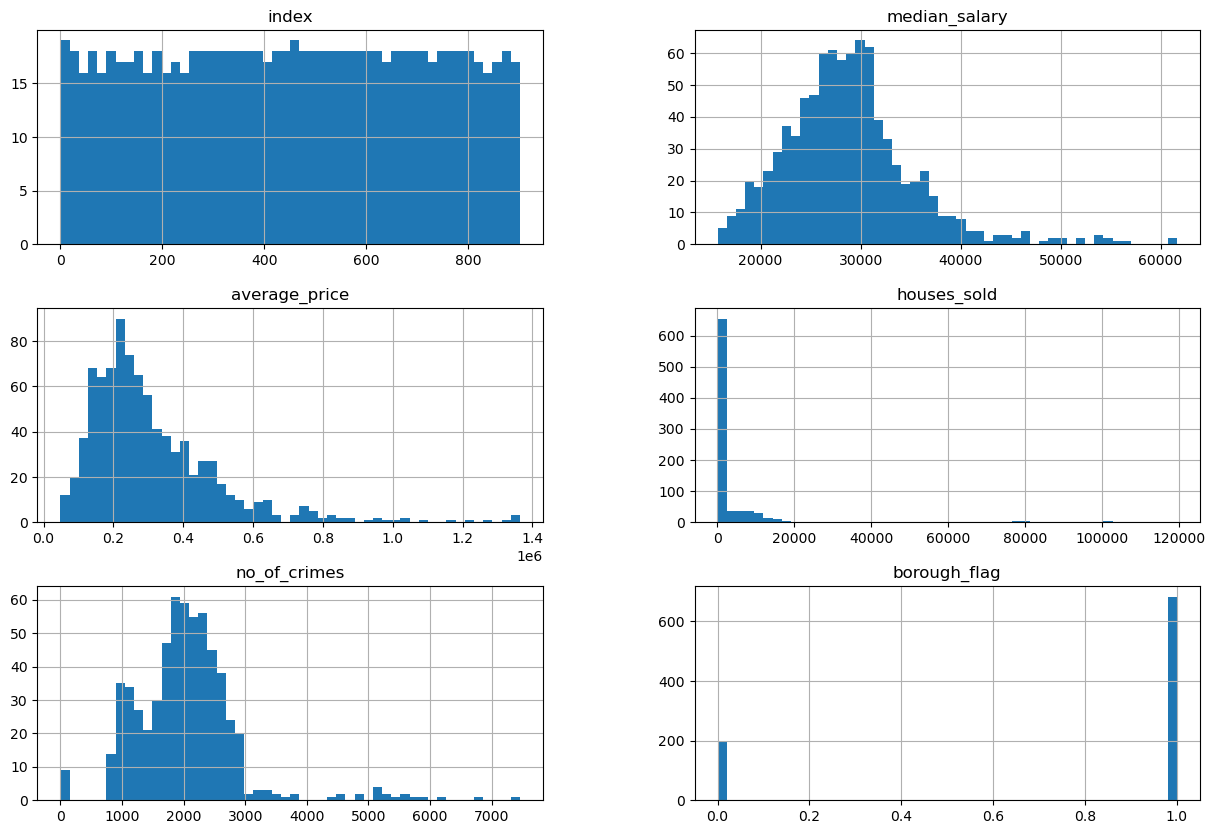

In [ ]:
# Realiza un Histograma para visualizar los datos 
#matplotlib inline para aquellos que estan con jupyter notebook
%matplotlib inline
data.hist(bins=50,figsize=(15,10))
plt.show()

***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

In [ ]:
#Importamos la función para dividir los datos train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
set_end,set_prueba = train_test_split(data, test_size =.3, random_state=45) ## random es para generar un semilla.

In [ ]:
print(len(set_end))
print(len(set_prueba))

632
271


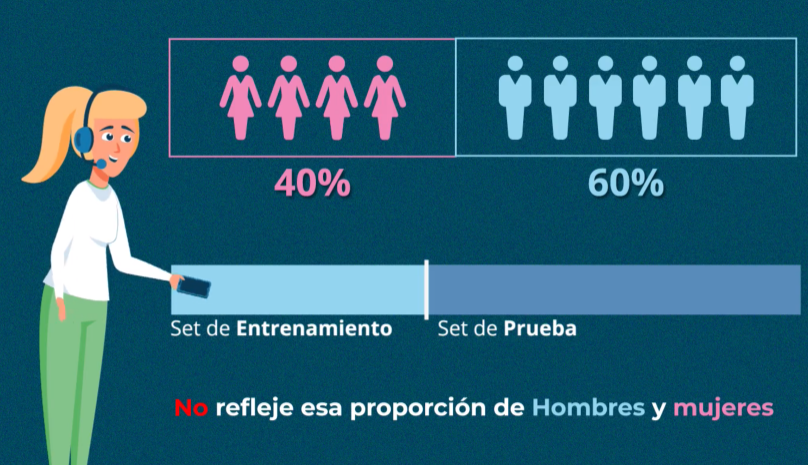
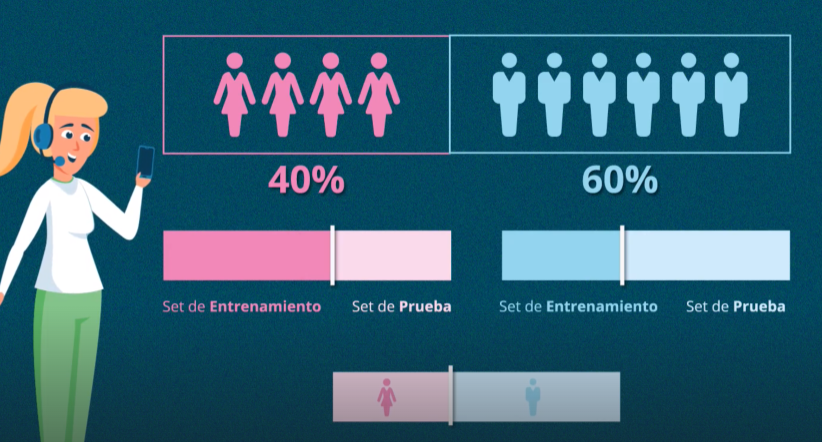

## del porcentaje de mujeres y de hombres, se saca el split y luego se junta

In [ ]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatorios.




In [ ]:
#confirmamos la división


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

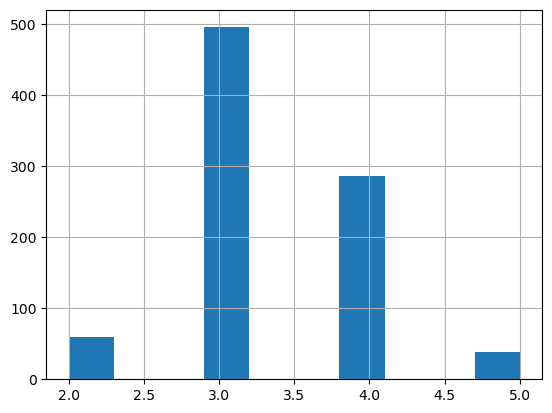

In [ ]:
# Para categorizar una variable, ejemplo con 5 niveles. 
data["salary_cat"]=pd.cut(data["median_salary"],
                          bins=[0,10000,20000,30000,40000,np.inf],labels=[1,2,3,4,5])
                           
#Hacer un histograma de las categorías
data["salary_cat"].hist()
plt.show()

In [ ]:
#Verificar que no existen datos en el bin #1
data["salary_cat"].value_counts()

salary_cat
3    496
4    287
2     59
5     39
1      0
Name: count, dtype: int64

In [ ]:
# Redefinir en 4 categorías, quitando en donde no hay datos (el bin#1)
data = data.dropna(subset=["median_salary"])
data=data.reset_index()


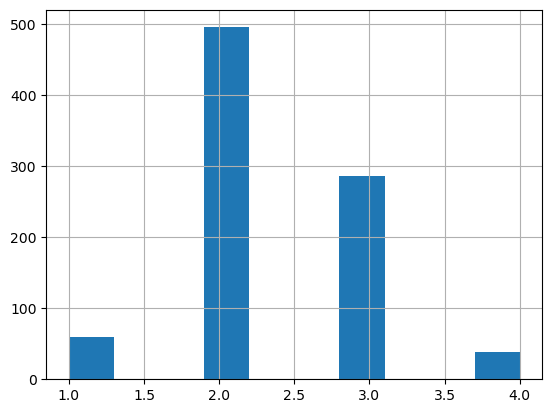

In [ ]:
data["salary_cat"]=pd.cut(data["median_salary"],
                          bins=[10000,20000,30000,40000,np.inf],
                          labels=[1,2,3,4])
                           
#Hacer un histograma de las categorías
data["salary_cat"].hist()
plt.show()

In [ ]:
#Verifica que si se redefinieron las categorías 
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
dividir = StratifiedShuffleSplit(n_splits =1, test_size =0.3, random_state = 45)

In [ ]:
for ent_index, prueba_index in dividir.split(data,data["salary_cat"]):
    cat_set_ent=data.loc[ent_index]  ## set de entrenamiento categorizado
    cat_set_prueba = data.loc[prueba_index]  ## set de prueba

In [ ]:
cat_set_prueba["salary_cat"].value_counts()

salary_cat
2    149
3     86
1     18
4     12
Name: count, dtype: int64

In [ ]:
149/496  # es el 30% 

0.3004032258064516

***

In [ ]:
# Creamos dataframe para trabajar con el set de entrenamiento
df = cat_set_ent.copy()
df.head()

index  median_salary                    area        date  average_price  \
323    336        21946.0           east midlands  2006-12-01         151841   
424    438        28234.0                  ealing  2009-12-01         279575   
560    574        28326.0                havering  2012-12-01         223743   
481    495        30806.0                lewisham  2010-12-01         223141   
53      55        25264.0  hammersmith and fulham  2000-12-01         262106   

          code  houses_sold  no_of_crimes  borough_flag salary_cat  
323  E12000004      10413.0           NaN             0          2  
424  E09000009        312.0        2392.0             1          2  
560  E09000016        231.0        1452.0             1          2  
481  E09000023        242.0        2119.0             1          3  
53   E09000013        255.0           NaN             1          2

***

## <span style="color:green">4. Visualizar los Datos Gráficamente </span>


Para esto vamos a necesitar, en conjunto con nuestro dataset LONDON_MAP, una nueva libreria que se llama geopandas, el cual exteiende la libreria pandas, para trabajar con datos geoespaciales, se puede encontrar más información en: https://geopandas.org/getting_started/introduction.html

https://www.cgohlke.com/#pyproj
https://www.youtube.com/watch?v=XnwK53aNwcU

en anaconda promt
conda install geopandas

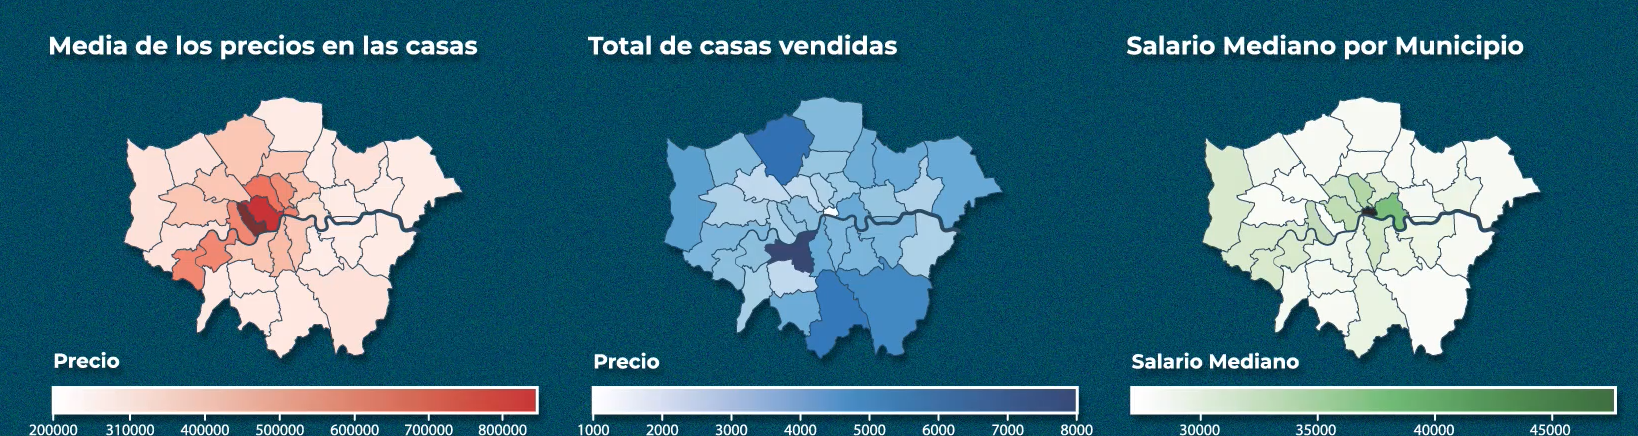

BAJAR LOS MAPAS
https://github.com/a2Proyectos/MachineLearning_Data

In [ ]:
#Importar geopandas
import geopandas as gpd
londres_map=gpd.read_file("map/London_Borough_Excluding_MHW.shp")
#Leer el mapa
londres_map.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1     None  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2     None  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3     None  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4     None  POLYGON ((510253.5 182881.6, 510249.9 182886, ...

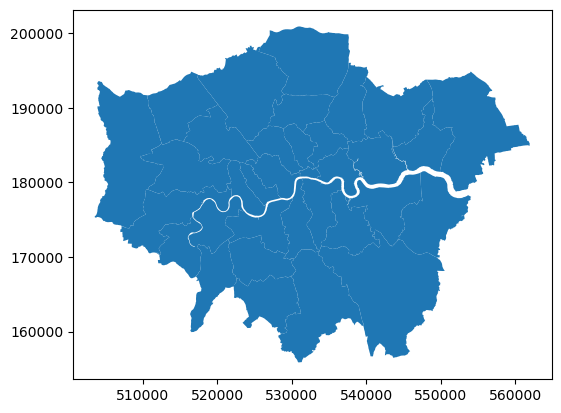

In [ ]:
# Graficamos el mapa
londres_map.plot()
plt.show()

***

Las tablas que se bajaron se debe sincronizar, y se debe limpiar para que puedan hablarse y estar juntas

In [ ]:
# Ajustamos los nombres de las columnas para despúes hacer un merge.
#utilizar lower para cambiar de mayúsculas a minúsculas 
# es los titulos deben esar todos en lo mismo
londres_map.columns = londres_map.columns.str.lower()
londres_map = londres_map.rename({"name":"area","gss_code":"code"},axis=1)
londres_map["area"]=londres_map["area"].str.lower()

#Seleccionar columnas necesarias


***

In [ ]:
londres_map.head()

area       code   hectares  nonld_area ons_inner sub_2009  \
0  kingston upon thames  E09000021   3726.117       0.000         F     None   
1               croydon  E09000008   8649.441       0.000         F     None   
2               bromley  E09000006  15013.487       0.000         F     None   
3              hounslow  E09000018   5658.541      60.755         F     None   
4                ealing  E09000009   5554.428       0.000         F     None   

  sub_2006                                           geometry  
0     None  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1     None  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2     None  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3     None  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4     None  POLYGON ((510253.5 182881.6, 510249.9 182886, ...

In [ ]:
londres_map=londres_map.filter(items=["area","code","hectares","geometry"])

In [ ]:
londres_map.head()

area       code   hectares  \
0  kingston upon thames  E09000021   3726.117   
1               croydon  E09000008   8649.441   
2               bromley  E09000006  15013.487   
3              hounslow  E09000018   5658.541   
4                ealing  E09000009   5554.428   

                                            geometry  
0  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4  POLYGON ((510253.5 182881.6, 510249.9 182886, ...

In [ ]:
# Seleccionar datos de nuestro set de entrenamiento
df_m = df.groupby("area").agg({"average_price":["mean"],"houses_sold":"sum","median_salary":["mean"]})

# Le asignamos nombre a las columnas del nuevo dataframe y reseteamos el indice


In [ ]:
df_m.head()

average_price houses_sold median_salary
                               mean         sum          mean
area                                                         
barking and dagenham  182996.428571      2937.0  28425.428571
barnet                327315.142857      6485.0  26764.428571
bexley                215843.000000      3976.0  26580.076923
brent                 287339.230769      3734.0  25206.769231
bromley               278804.750000      5836.0  25316.250000

In [ ]:
df_m.columns=["average_price","houses_sold","median_salary"]
df_m.reset_index(inplace=True)
df_m.head()

area  average_price  houses_sold  median_salary
0  barking and dagenham  182996.428571       2937.0   28425.428571
1                barnet  327315.142857       6485.0   26764.428571
2                bexley  215843.000000       3976.0   26580.076923
3                 brent  287339.230769       3734.0   25206.769231
4               bromley  278804.750000       5836.0   25316.250000

In [ ]:
# Combinar dtaframes
londres_map=pd.merge(londres_map,df_m,on="area")
londres_map.head()

area       code   hectares  \
0  kingston upon thames  E09000021   3726.117   
1               croydon  E09000008   8649.441   
2               bromley  E09000006  15013.487   
3              hounslow  E09000018   5658.541   
4                ealing  E09000009   5554.428   

                                            geometry  average_price  \
0  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  318729.363636   
1  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  264942.571429   
2  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  278804.750000   
3  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  286041.071429   
4  POLYGON ((510253.5 182881.6, 510249.9 182886, ...  318157.307692   

   houses_sold  median_salary  
0       2376.0   27117.454545  
1       6099.0   28527.714286  
2       5836.0   25316.250000  
3       3419.0   30362.357143  
4       4063.0   28098.923077

***

In [ ]:
#Gráfica del promedio de los precios en las casas 
#Cuando se grafica en geopandas hay muchos argumentos, no s

#plt=londres_map.plot(column = "average_price", cmap = "Reds", edgecolor ="maroon", legend = True, legend_kwds={"label":"Precio", "orientation":"horizontal"})
#plt.set_title("Media de los precios de casas")
#plt.axis("off")


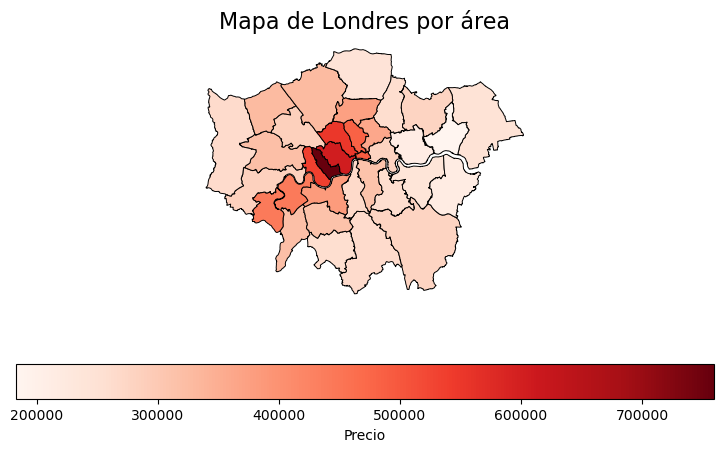

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
londres_map.plot(column='average_price',  # <- reemplaza con el nombre real
                 cmap='Reds', 
                 edgecolor='black',
                 ax=ax,# colormap: puedes cambiar a 'viridis', 'Blues', etc.
                 legend=True,
                 linewidth=0.7,
                 legend_kwds={"label":"Precio", "orientation":"horizontal"})
ax.set_title('Mapa de Londres por área', fontsize=16)
ax.axis('off')  # Oculta los ejes
plt.show()

In [ ]:
##![image.png](attachment:c0b1b6bf-63a2-49dd-a05a-027ec2a1fdb0.png)

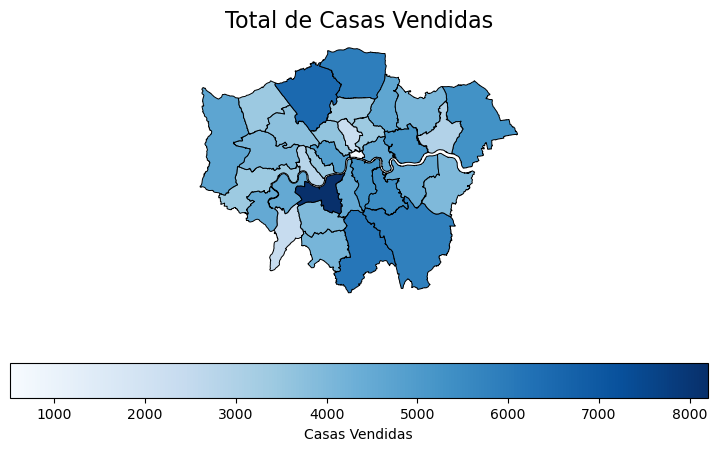

In [ ]:
## plt=londres_map.plot(column = "houses_sold", cmap = "Blues", edgecolor ="maroon", legend = True, legend_kwds={"label":"Casas Vendidas", "orientation":"horizontal"})
## plt.set_title("Total de Casas Vendidas)")
## plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
londres_map.plot(column='houses_sold',  # <- reemplaza con el nombre real
                 cmap='Blues', 
                 edgecolor='black',
                 ax=ax,# colormap: puedes cambiar a 'viridis', 'Blues', etc.
                 legend=True,
                 linewidth=0.7,
                 legend_kwds={"label":"Casas Vendidas", "orientation":"horizontal"})
ax.set_title('Total de Casas Vendidas', fontsize=16)
ax.axis('off')  # Oculta los ejes
plt.show()


In [ ]:
## ![image.png](attachment:f35cf25d-2a3a-4688-8663-56046c41fd32.png)

💸: Recuerden que los precios son mayores en el centro de la cuidad

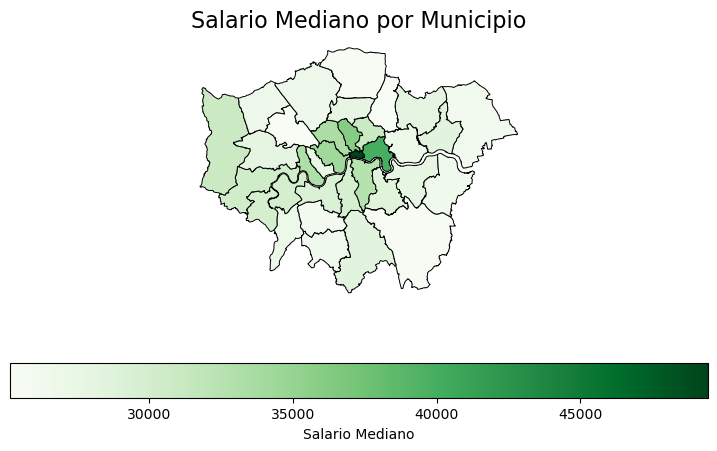

In [ ]:
#plt=londres_map.plot(column = "median_salary", cmap = "Greens", edgecolor ="black", legend = True, legend_kwds={"label":"Salario Mediano", "orientation":"horizontal"})
#plt.set_title("Salario Mediano por Municipio)")
#plt.axis("off")

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
londres_map.plot(column='median_salary',  # <- reemplaza con el nombre real
                 cmap='Greens', 
                 edgecolor='black',
                 ax=ax,# colormap: puedes cambiar a 'viridis', 'Blues', etc.
                 legend=True,
                 linewidth=0.7,
                 legend_kwds={"label":"Salario Mediano", "orientation":"horizontal"})
ax.set_title('Salario Mediano por Municipio', fontsize=16)
ax.axis('off')  # Oculta los ejes
plt.show()

In [ ]:
## ![image.png](attachment:47c7d784-e75d-43ce-98c3-dbe89021d3a0.png)


***

## <span style="color:green">5. Medir la Correlación </span>


In [ ]:
# Crear matriz de correlación


# Comparar correlación


In [ ]:
#Importar seaborn 


# Crear vector


# Graficar


In [ ]:
#Importar pandas 


#Para graficar scatter_matrix...


In [ ]:
#Por si quieren ver una gráfica en específico más a detalle


***

## <span style="color:green">6. Combinación de Variables </span>


In [ ]:
#Armar una columna para hacer las combinaciones que necesitamos

# Crear matriz de correlación


***

***

## <span style="color:Blue">7. Transformación de Datos </span>


In [ ]:
# Crear Dataframe de predictores y variable a predecir ✂️

#Nuevo dataframe sin average_price


***

In [ ]:
#Darte una idea de a qué variables le hace faltan datos

#Calcular la suma de todos los vacíos  


In [ ]:
#Quitar el número de crímenes por su alta cantidad de datos vacíos 


In [ ]:
#Tomamos la media 

#Llenamos los valores con la media

#Verifica que no hay datos vacíos


***

Recuerden que volvimos a ejecutar la línea de código de "df = cat_set_ent.drop('average_price', axis=1)" para hacer este ejercicio

In [ ]:
#BIENVENIDOS A SCIKIT <3 Serán unos expertos al final. 
# Rellenar valores con scikit
#1. Recuerden: importar lo que vayas a utiliza, en este caso SimpleImputer


# 2. Crear objeto, en este caso se llamará imputer



# data numérico


#Ejecuta Imputer


#Aplicar transform para rellenar las medianas 


#Regresarlo a dataframe 


***

## <span style="color:Blue">8. Manejo de texto y valores categóricos </span>

In [ ]:
#definir que variable vamos a cambiar a valor numérico

#Convertir variables de texto en numéricas

#verificar que si se haya transformado


#Por si quieres ver como funciona el encoder


In [ ]:
#ONE HOT ENCODER, es importante recordar y entender esta función porque la usaremos en todo el curso
#Convertir variables categóricas en binarias
#Importar OneHotEncoder

#Crear objeto

#Ajustar

#obligar a que nos muestre la matriz 


***

## <span style="color:Blue">9. Escalación de variables </span>


#### <span style="color:Blue">9.1 Normalización </span>

In [ ]:
#Importar MinMaxScaler

#Creamos el objeto 

#Hacer un dataframe con la transformación


#### <span style="color:Blue">9.2 Estandarización </span>

In [ ]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 

#Crea objeto

#Hacer un dataframe con la transformación


***

## <span style="color:Blue">10. Pipeline </span>


In [ ]:
# Crear función de pipeline


In [ ]:
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)

#Hacer un datframe que usaremos para la regresión linea

#Visualiza los datos 


***

***

## <span style="color:purple">11. Seleccionar y entrenar modelos </span>

In [ ]:
## Hacer Regresión Lineal (AL FIN)


In [ ]:
#Análisis preambultario de los errores


***

#### <span style="color:purple">11.1 RMSE </span>

In [ ]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE


In [ ]:
#Sacar el promedio 


In [ ]:
#Calcular el porcentaje de acierto


***

#### <span style="color:purple">11.2 Árbol de Decisión </span>

In [ ]:
# importar DecisionTreeRegressor

#crear objeto 

#correrlo


#calcular el error


***

#### <span style="color:purple">11.3 Validación Cruzada </span>

¡Anota esto porque es importante!

In [ ]:
#Importar cross_val_score, creo objeto, corro mi función


In [ ]:
#Calcular el porcentaje de acierto de validación cruzada 


***

#### <span style="color:purple">11.4 Bosque Aleatorio </span>
¡Este también es importante!

In [ ]:
#Importar RandomForestRegressor, creo objeto, corro mi función


#calcular el error


In [ ]:
#Calcular el el promedio de la suma de los errores al cuadrado


In [ ]:
#Calcular el porcentaje de acierto de bosque aleatorio


***

## <span style="color:purple">12. Afinar el modelo </span>

### <span style="color:purple">12.1 Grid Search</span>

In [ ]:
#Importar GridSearchCV


### <span style="color:purple">12.2 set de prueba</span>

In [ ]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 

#Define cuál es el modelo final 


#Aquí definimos cuál será nuestra variable a predecir y las predichas 



#Ahora, sí. El pipeline para limpieza de datos 



#Por último, ver el error del modelo 


In [ ]:
#Ver el porcentaje de acierto
